# Stock Prediction Project
 
<br>
<h2><center>DSC 680 Winter 2024</center></h2>
<h2><center>Garth Scheck </center></h2>
<center>12/13/2024</center>
<br>
<br>

This is a notebook for exploring the possibility of predicting stock prices using the SARIMAX model.

In [11]:
import requests
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter('ignore')

https://marketstack.com/dashboard

e535a871ce5cfae54b46fc6725670c40


#example request
https://api.marketstack.com/v1/eod
    ? access_key = e535a871ce5cfae54b46fc6725670c40
    & symbols = AAPL
    & date_from = 2024-11-15
    & date_to = 2024-11-25

### Practice getting market data using ONTO symbol

In [12]:
import requests

#import data using API call
url = "https://api.marketstack.com/v1/eod?access_key=e535a871ce5cfae54b46fc6725670c40"

querystring1 = {"symbols":"BIIB","date_from":"2022-01-01", "date_to":"2022-07-30"}
querystring2 = {"symbols":"BIIB","date_from":"2022-08-01", "date_to":"2022-12-31"}
querystring3 = {"symbols":"BIIB","date_from":"2023-01-01", "date_to":"2023-07-30"}
querystring4 = {"symbols":"BIIB","date_from":"2023-08-01", "date_to":"2023-12-30"}
querystring5 = {"symbols":"BIIB","date_from":"2024-01-01", "date_to":"2024-07-31"}
querystring6 = {"symbols":"BIIB","date_from":"2024-08-01", "date_to":"2024-11-28"}

#querystring = {"symbols":"NVDA","date_from":"2024-01-01", "date_to":"2024-07-28"}
response1 = requests.get(url, params=querystring1)
response2 = requests.get(url, params=querystring2)
response3 = requests.get(url, params=querystring3)
response4 = requests.get(url, params=querystring4)
response5 = requests.get(url, params=querystring5)
response6 = requests.get(url, params=querystring6)

print(response1.json())

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 144}, 'data': [{'open': 212.51, 'high': 216.69, 'low': 211.59, 'close': 215.06, 'volume': 1152000.0, 'adj_high': None, 'adj_low': None, 'adj_close': 215.06, 'adj_open': None, 'adj_volume': None, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'BIIB', 'exchange': 'XNAS', 'date': '2022-07-29T00:00:00+0000'}, {'open': 212.36, 'high': 215.22, 'low': 208.73, 'close': 214.2, 'volume': 852636.0, 'adj_high': None, 'adj_low': None, 'adj_close': 214.2, 'adj_open': None, 'adj_volume': None, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'BIIB', 'exchange': 'XNAS', 'date': '2022-07-28T00:00:00+0000'}, {'open': 209.65, 'high': 213.67, 'low': 209.65, 'close': 212.92, 'volume': 814602.0, 'adj_high': None, 'adj_low': None, 'adj_close': 212.92, 'adj_open': None, 'adj_volume': None, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'BIIB', 'exchange': 'XNAS', 'date': '2022-07-27T00:00:00+0000'}, {'open': 206.7, 'high': 214.0, 'low': 206.7,

### Create a method based of example above for getting market data for any stock

In [13]:
import requests
import pandas as pd
import json
from datetime import datetime

def get_data(stock_symbol):
    url = "https://api.marketstack.com/v1/eod?access_key=e535a871ce5cfae54b46fc6725670c40"
    
    querystring1 = {"symbols":stock_symbol,"date_from":"2022-01-01", "date_to":"2022-07-30"}
    querystring2 = {"symbols":stock_symbol,"date_from":"2022-08-01", "date_to":"2022-12-31"}
    querystring3 = {"symbols":stock_symbol,"date_from":"2023-01-01", "date_to":"2023-07-30"}
    querystring4 = {"symbols":stock_symbol,"date_from":"2023-08-01", "date_to":"2023-12-30"}
    querystring5 = {"symbols":stock_symbol,"date_from":"2024-01-01", "date_to":"2024-07-31"}
    querystring6 = {"symbols":stock_symbol,"date_from":"2024-08-01", "date_to":"2024-11-28"}
    
    #querystring = {"symbols":"NVDA","date_from":"2024-01-01", "date_to":"2024-07-28"}
    response1 = requests.get(url, params=querystring1)
    response2 = requests.get(url, params=querystring2)
    response3 = requests.get(url, params=querystring3)
    response4 = requests.get(url, params=querystring4)
    response5 = requests.get(url, params=querystring5)
    response6 = requests.get(url, params=querystring6)

    # Parse the JSON string into a Python dictionary
    data1 = response1.json()
    data2 = response2.json()
    data3 = response3.json()
    data4 = response4.json()
    data5 = response5.json()
    data6 = response6.json()

    df1 = pd.json_normalize(data1['data'])
    df2 = pd.json_normalize(data2['data'])
    df3 = pd.json_normalize(data3['data'])
    df4 = pd.json_normalize(data4['data'])
    df5 = pd.json_normalize(data5['data'])
    df6 = pd.json_normalize(data6['data'])
    
    df1 = df1[["close","date"]]
    df2 = df2[["close","date"]]
    df3 = df3[["close","date"]]
    df4 = df4[["close","date"]]
    df5 = df5[["close","date"]]
    df6 = df6[["close","date"]]
    df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

    df['date'] = pd.to_datetime(df['date']).dt.date
    df=df.sort_values(by='date')
    df

    df = df.set_index('date').asfreq('d')
    df.fillna(method='bfill', inplace=True)
    
    df = df.resample('1W').mean()
    
    return df
    #print(response1.json())

### Create a method for forecasting stock price using the SARIMAX model

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def prediction(train, steps):
    sarimax = SARIMAX(train['close'], 
        order=(2, 1, 2), 
        seasonal_order=(0, 2, 2, 7), 
        enforce_stationarity=False, 
        enforce_invertibility=False)
    
    
    model_res = sarimax.fit()

    pred = model_res.forecast(steps=steps, signal_only=False)
    
    return pred


### Create dataframe from Json data.

In [15]:
import json

# Parse the JSON string into a Python dictionary
data1 = response1.json()
data2 = response2.json()
data3 = response3.json()
data4 = response4.json()
data5 = response5.json()
data6 = response6.json()

In [16]:
import pandas as pd
# transform data
df1 = pd.json_normalize(data1['data'])
df2 = pd.json_normalize(data2['data'])
df3 = pd.json_normalize(data3['data'])
df4 = pd.json_normalize(data4['data'])
df5 = pd.json_normalize(data5['data'])
df6 = pd.json_normalize(data6['data'])

df1 = df1[["close","date"]]
df2 = df2[["close","date"]]
df3 = df3[["close","date"]]
df4 = df4[["close","date"]]
df5 = df5[["close","date"]]
df6 = df6[["close","date"]]
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [17]:
from datetime import datetime
# convert date column from string to date type
df['date'] = pd.to_datetime(df['date']).dt.date
df=df.sort_values(by='date')
df

,close,date
99,202.01,2022-03-08
98,202.27,2022-03-09
97,198.64,2022-03-10
96,197.67,2022-03-11
95,193.77,2022-03-14
...,...,...
504,158.01,2024-11-21
503,157.90,2024-11-22
502,158.71,2024-11-25
501,157.69,2024-11-26


In [18]:
# convert date column to an index
df = df.set_index('date').asfreq('d')
df.fillna(method='bfill', inplace=True)

df = df.resample('1W').mean()

### Perform Seasonal Decomposition

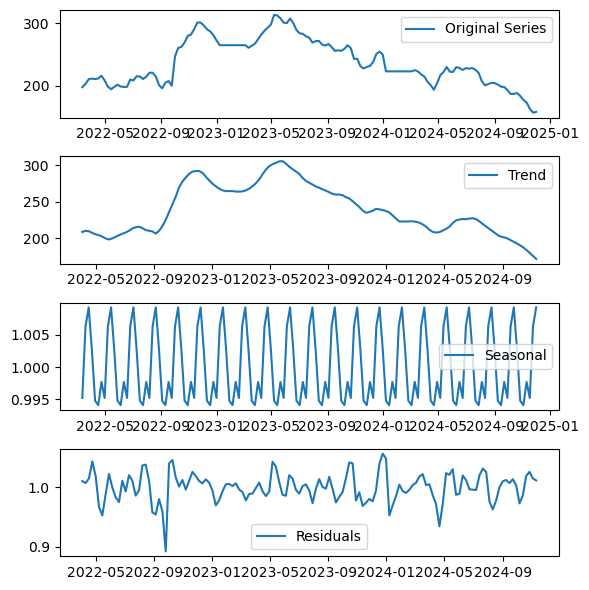

In [19]:
# importing the required libraries
from statsmodels.tsa.seasonal import seasonal_decompose  
import matplotlib.pyplot as plt
import numpy as np

result = seasonal_decompose(df['close'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()
 
# Plot the decomposed components
plt.figure(figsize=(6,6))
 
plt.subplot(4, 1, 1)
plt.plot(df['close'], label='Original Series')
plt.legend()
 
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
 
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()
 
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
 
plt.tight_layout()
plt.show()

### Split data into training and test sets

In [20]:
# from pmdarima.model_selection import train_test_split

# size = len(df.index)

# t_size = int(size * .8)

# # split the data into test and train
# train, test = train_test_split(df, train_size=t_size)

In [21]:
# split the data into training and test sets using dates
ratio = 0.80

total_rows = df.shape[0]
train_size = int(total_rows*ratio)

train = df[0:train_size]
test = df[train_size:]

In [22]:
train.shape

(114, 1)

In [23]:
test.shape

(29, 1)

### Plot the dataframe

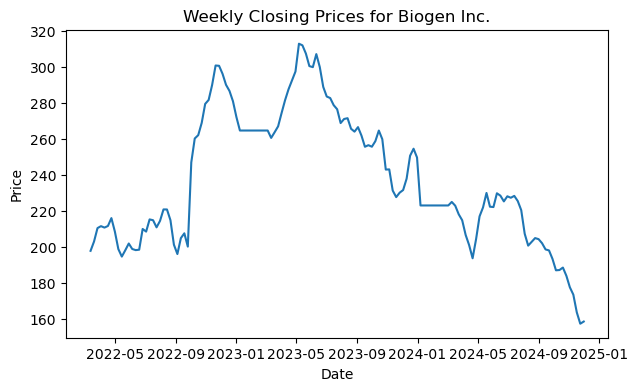

In [25]:
plt.figure(figsize=(7,4))
plt.plot(df, color='#1f76b4')
plt.title("Weekly Closing Prices for Biogen Inc.")
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

### Plot the dataframe with moving average to show trend.

<Axes: title={'center': 'Moving Average'}, xlabel='date', ylabel='Stock Price'>

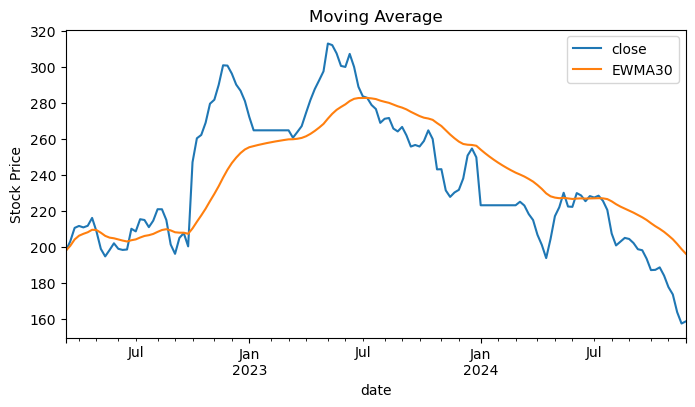

In [26]:
# Extract 'Close' column and convert to DataFrame
avg_df = df['close'].to_frame()
 
# Calculate 30-day Simple Moving Average (SMA)
avg_df['SMA30'] = avg_df['close'].rolling(30).mean()
avg_df['CMA30'] = avg_df['close'].expanding().mean()
avg_df['EWMA30'] = avg_df['close'].ewm(span=30).mean()

avg_df[['close', 'EWMA30']].plot(title= 'Moving Average', ylabel='Stock Price', figsize=(8, 4))

### Define a grid search method

In [27]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import itertools
import statsmodels.api as sm

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# create combinations of p, q and q
pdq = list(itertools.product(p, d, q))

# create different combinations of seasonal p, q and q
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

# define a function to perform a grid search
def gridsearch(data, pdq, pdqs, maxiter=50):
    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                #create model and fit
                mod = sm.tsa.statespace.SARIMAX(data, 
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                                                #freq='MS')

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
            except  Exception as e:
                # display exception
                print('Exception: %s', repr(e))
                continue
            
    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return five combinations with lowest BIC value
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df

gridsearch(train['close'], pdq, pdqs)

,pdq,pdqs,bic
224,"(0, 2, 2)","(0, 2, 2, 7)",615.270601
116,"(0, 1, 1)","(0, 2, 2, 7)",616.671644
143,"(0, 1, 2)","(0, 2, 2, 7)",616.928960
233,"(0, 2, 2)","(1, 2, 2, 7)",619.664728
359,"(1, 1, 1)","(0, 2, 2, 7)",620.061142


### Run model with pdq and pdqs values selected from grid search.

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax = SARIMAX(train['close'], 
    # order=(2, 1, 2), 
    # seasonal_order=(0, 2, 2, 7), 
    order=(1, 1, 1), 
    seasonal_order=(0, 2, 2, 7), 
    enforce_stationarity=False, 
    enforce_invertibility=False)


model_res = sarimax.fit()

model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                  close   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(0, 2, [1, 2], 7)   Log Likelihood                -298.983
Date:                                Fri, 13 Dec 2024   AIC                            607.967
Time:                                        10:16:49   BIC                            620.061
Sample:                                    03-13-2022   HQIC                           612.826
                                         - 05-12-2024                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2952      0.288     -1.026      0.305      -0.859       0.269
ma.L1          0.5592      0.262      2.138      0.033       0.046       1.072
ma.S.L7       -1.9711   1104.561     -0.002      0.999   -2166.871    2162.929
ma.S.L14       1.0001   1120.958      0.001      0.999   -2196.038    2198.038
sigma2        53.3985   5.98e+04      0.001      0.999   -1.17e+05    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                35.49
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -1.07
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot the forecast from the model

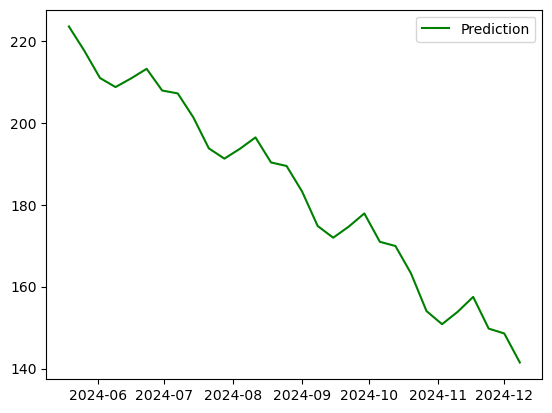

In [29]:
pred = model_res.forecast(steps=30, signal_only=False)

plt.plot(pred, color='green', label = 'Prediction')
plt.legend()

## Plot the training, test and forecast data on one plot to see if forecast follows test data.

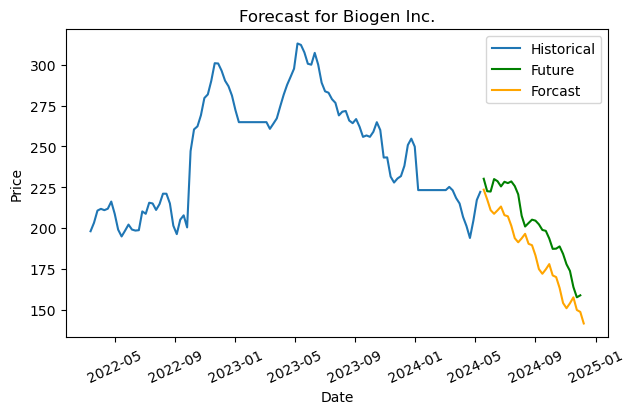

In [30]:
plt.figure(figsize=(7,4))
plt.plot(train, color='#1f76b4', label='Historical')
plt.plot(test, color='green', label='Future')
plt.plot(pred, color='orange', label='Forcast')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Forecast for Biogen Inc.")
plt.xticks(rotation = 25)
plt.legend()
plt.show()

view-source:https://simplywall.st/discover/investing-ideas/10189/analysts-top-stock-pics/us


### Get recommended stocks from Wall Street website.

In [32]:
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://simplywall.st/discover/investing-ideas/10189/analysts-top-stock-pics/us'
r = requests.get(url)

soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib

scripts = soup.find_all('script')
data = ''
row_cntr = 0
for script in scripts:
    if row_cntr == 2:
        #print(script)
        script_str = str(script)
        pos = script_str.find("{")
        data = script_str[pos:]
        #print(data)
    row_cntr+=1

data = data.strip("</script>?")

data = json.loads(data)
#print(data)
df = pd.json_normalize(data['mainEntity'])

df.head()

,@type,name,itemListOrder,itemListElement
0,ItemList,U.S. Top Stock Picks from Analysts - Investing...,http://schema.org/ItemListOrderAscending,"[{'@type': 'ListItem', 'position': 1, 'item': ..."


### Write list to file incase website is not available.

In [33]:
import numpy as np

top_ten = df[["itemListElement"]]

writePath = r'c:\temp\top_stocks.json'

with open(writePath, 'a') as f:
    f.write(top_ten.to_string(header=False, index=False))

### Create list of stocks.

In [35]:
import ast
import json
import re

file1 = open(writePath, "r") 
inpt = file1.read()
file1.close()

json_data = ast.literal_eval(json.dumps(inpt))

elements = re.split(",", json_data)

# build list
symbols = []
for element in elements:
    e = re.split(":", element)
    if len(e) > 1:
        if 'tickerSymbol' in e[0]:
            symbol = e[1].strip(' ')
            symbols.append(symbol.strip('\''))

print(symbols)

['PDD', 'BIIB', 'SYM', 'MRNA', 'RPRX', 'SMMT', 'PCVX', 'AES', 'XP', 'ONTO', 'LEGN', 'ASTS', 'LKNC.Y', 'CYTK', 'WFRD', 'VKTX', 'IONS', 'ZK', 'RNA', 'BBIO', 'LBTY.A', 'ZETA', 'MMS', 'RARE', 'PDD', 'BIIB', 'SYM', 'MRNA', 'RPRX', 'SMMT', 'PCVX', 'AES', 'XP', 'ONTO', 'LEGN', 'ASTS', 'LKNC.Y', 'CYTK', 'WFRD', 'VKTX', 'IONS', 'ZK', 'RNA', 'BBIO', 'LBTY.A', 'ZETA', 'MMS', 'RARE', 'PDD', 'BIIB', 'SYM', 'MRNA', 'RPRX', 'SMMT', 'PCVX', 'AES', 'XP', 'ONTO', 'LEGN', 'ASTS', 'LKNC.Y', 'CYTK', 'WFRD', 'VKTX', 'IONS', 'ZK', 'RNA', 'BBIO', 'LBTY.A', 'ZETA', 'MMS', 'RARE', 'PDD', 'BIIB', 'MRNA', 'RPRX', 'SYM', 'SMMT', 'PCVX', 'AES', 'XP', 'ONTO', 'LEGN', 'ASTS', 'CYTK', 'LKNC.Y', 'VKTX', 'WFRD', 'IONS', 'ZK', 'BBIO', 'RNA', 'LBTY.A', 'ZETA', 'RARE', 'MMS', 'PDD', 'BIIB', 'MRNA', 'RPRX', 'SYM', 'SMMT', 'PCVX', 'AES', 'XP', 'ONTO', 'LEGN', 'ASTS', 'CYTK', 'LKNC.Y', 'VKTX', 'WFRD', 'IONS', 'ZK', 'BBIO', 'RNA', 'LBTY.A', 'ZETA', 'RARE', 'MMS', 'PDD', 'BIIB', 'MRNA', 'RPRX', 'SYM', 'SMMT', 'PCVX', 'AES', 'XP

### Application for getting different forecasts

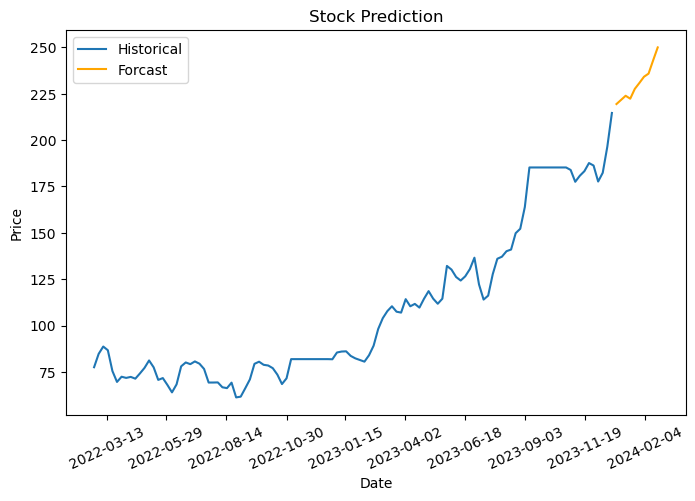

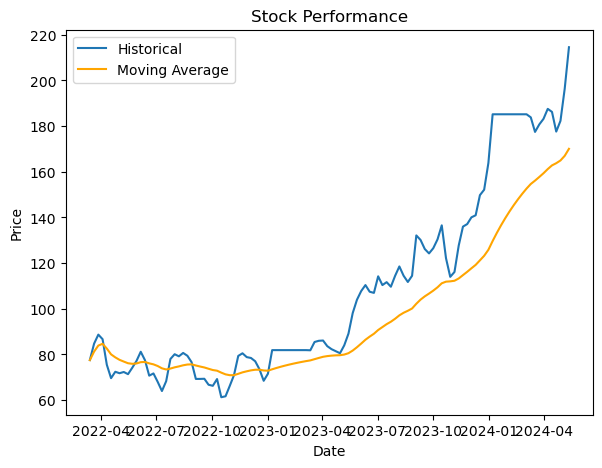

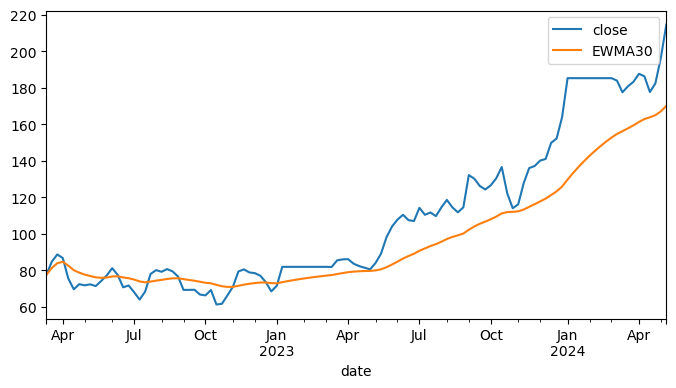

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk 
from tkinter import *
from tkinter import ttk 
from tkinter import Button
import requests
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

url = "https://api.marketstack.com/v1/eod?access_key=e535a871ce5cfae54b46fc6725670c40"

class canvas_class(tk.Variable):
    def __init__(self):
        super().__init__()
        self.current = None
        
    def set(self, value: object):
        self.current = value
        # calling set on super to trigger write mode traces
        super().set(value)
        
    def get(self):
        # similarly for triggering read mode traces
        super().get()
        return self.current

def create_canvas(fig, window, canv):
    c = FigureCanvasTkAgg(fig, master = window)  
    canv.set(c)

def remove_plot(canv):
    canv.get_tk_widget().destroy()

def buttonClick(_callback = None): 
    # remove previous plots if they exist
    try:
        c = canvas.get()
        if c != None:
            remove_plot(c)

        c = canvas2.get()
        if c != None:
            remove_plot(c)
    except:
        exists = False

    # get the data for the selected stock
    df = get_data(stock_symbols.get())

    # split data into test and train
    ratio = 0.80
    
    total_rows = df.shape[0]
    train_size = int(total_rows*ratio)
    
    train = df[0:train_size]
    test = df[train_size:]
    
    pred = prediction(train, 10)

    # the figure that will contain the plot 
    fig = Figure(figsize = (10, 10), 
                 dpi = 100) 
    fig2 = Figure(figsize = (10, 10), 
                 dpi = 100) 
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    fig2, ax2 = plt.subplots(figsize=(8, 5))
    
    # create forecast plot
    ax.plot(train, color='#1f76b4', label='Historical')
    ax.plot(pred, color='orange', label='Forcast')
    ax.set_title("Stock Prediction")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    
    # get every n-th value
    labels = train.reset_index().rename(columns={'index': 'date'})
    labels['date'] = labels['date'].dt.date
    nth = int(len(labels.index)/10)

    labels = labels.iloc[::nth]
    ax.set_xticklabels(labels['date'], rotation=25)


    avg_df = train['close'].to_frame()
     
    # Create 30-day Simple Moving Average (SMA) plot
    avg_df['SMA30'] = avg_df['close'].rolling(30).mean()
    avg_df['CMA30'] = avg_df['close'].expanding().mean()
    avg_df['EWMA30'] = avg_df['close'].ewm(span=30).mean()
    
    avg_df[['close', 'EWMA30']].plot(label='Stock Price', figsize=(8, 4))
    ax2.plot(avg_df['close'], color='#1f76b4', label='Historical')
    ax2.plot(avg_df['EWMA30'], color='orange', label='Moving Average')
    ax2.set_title("Stock Performance")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Price")
    ax2.legend()

    # create canvas for plot
    _callback(fig, window, canvas)
    canvas_1 = canvas.get()
    canvas_1.draw() 

    # create canvas for second plot
    _callback(fig2, window, canvas2)
    canvas_2 = canvas2.get()
    canvas_2.draw() 

    # placing the canvases on the Tkinter window   
    canvas_1._tkcanvas.pack(padx=5, pady=20, side=tk.LEFT)
    canvas_2._tkcanvas.pack(padx=5, pady=20, side=tk.LEFT)

    high = Label(text = "Max: " + str(round(df['close'].max(), 2)))
    high.place(x=100,y=80)
    high.config(font=("Arial", 20))

    median = Label(text = "Avg: " + str(round(df['close'].mean(), 2)))
    median.place(x=300,y=80)
    median.config(font=("Arial", 20))

# Creating tkinter window 
window = tk.Tk() 
window.title('Stock Price Forcaster') 
window.geometry('1500x800') 

# create two canvas objects
canvas = canvas_class()
canvas2 = canvas_class()

lbl = Label(text = "Stock")
# Combobox creation 
n = tk.StringVar() 
stock_symbols = ttk.Combobox(window, width = 27, textvariable = n) 
  
# Adding combobox drop down list 
stock_symbols['values'] = symbols

btn = Button(window, text = 'Price', 
                command = lambda: buttonClick(create_canvas)) 
lbl.place(x=130,y=5)
btn.place(x=350,y=20)
stock_symbols.place(x=130,y=22)
stock_symbols.current() 
window.mainloop() 